## Figures and tables for: `Researchers’ institutional mobility`

### Definitions

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import geoplot
import geopandas as gpd
import numpy as np
pd.options.display.float_format = '{:,.1f}'.format

## Loading data

`df` contains all disciplines

In [2]:
df = pd.read_csv('../data/dataset_public.csv')
df.head()

,organization_name,discipline_name,grid_id,discipline_id,number_researchers,pct_insiders,pct_domesticoutsiders,pct_foreignoutsiders,grid_country_code,established_year,country_name,geo_region,continent,latitude,longitude
0,Australian National University,Earth Sciences,grid.1001.0,4,173,35.8,23.7,40.5,AU,1946,Australia,Oceania,Oceania,-35.3,149.1
1,Australian National University,All,grid.1001.0,99,2706,38.1,24.0,37.9,AU,1946,Australia,Oceania,Oceania,-35.3,149.1
2,Australian National University,Physical Sciences,grid.1001.0,2,309,35.9,15.9,48.2,AU,1946,Australia,Oceania,Oceania,-35.3,149.1
3,Australian National University,"Commerce, Management, Tourism and Services",grid.1001.0,15,57,40.4,22.8,36.8,AU,1946,Australia,Oceania,Oceania,-35.3,149.1
4,Australian National University,Agricultural and Veterinary Sciences,grid.1001.0,7,45,44.4,26.7,28.9,AU,1946,Australia,Oceania,Oceania,-35.3,149.1


`gdf` contains only discipline `All` and GeoPandas geometries for map plotting. This is used to generate all figures and tables except Figure `5`

In [3]:
gdf = df[df.discipline_name == 'All']
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude),crs='epsg:4326')
gdf.head()

,organization_name,discipline_name,grid_id,discipline_id,number_researchers,pct_insiders,pct_domesticoutsiders,pct_foreignoutsiders,grid_country_code,established_year,country_name,geo_region,continent,latitude,longitude,geometry
1,Australian National University,All,grid.1001.0,99,2706,38.1,24.0,37.9,AU,1946,Australia,Oceania,Oceania,-35.3,149.1,POINT (149.12050 -35.27780)
32,Monash University,All,grid.1002.3,99,5672,30.0,40.1,29.9,AU,1958,Australia,Oceania,Oceania,-37.9,145.1,POINT (145.13800 -37.90830)
39,University of Liverpool,All,grid.10025.36,99,2790,32.0,42.6,25.4,GB,1882,United Kingdom,Western and Northern Europe,Europe,53.4,-3.0,POINT (-2.96560 53.40611)
71,University of Queensland,All,grid.1003.2,99,6424,38.2,27.4,34.5,AU,1909,Australia,Oceania,Oceania,-27.5,153.0,POINT (153.00963 -27.49596)
80,Macquarie University,All,grid.1004.5,99,2041,26.7,39.9,33.4,AU,1964,Australia,Oceania,Oceania,-33.8,151.1,POINT (151.11291 -33.77526)


### Map data
`world` contains geometries with countries

In [4]:
world = gpd.read_file('zip://../data/ne_110m_admin_0_countries.zip')
world = world[world.TYPE.isin(['Sovereign country','Country'])]
world.loc[world.SOVEREIGNT == 'Norway','WB_A2'] = 'NO'  
world.loc[world.SOVEREIGNT == 'Taiwan','WB_A2'] = 'TW'
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,Admin-0 country,1,3,Kazakhstan,KAZ,0,2,Sovereign country,Kazakhstan,KAZ,...,카자흐스탄,Kazachstan,Kazachstan,Cazaquistão,Казахстан,Kazakstan,Kazakistan,Kazakhstan,哈萨克斯坦,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."


### Table 1. Descriptive overview

In [5]:
table1 = gdf[['number_researchers','established_year','pct_insiders','pct_domesticoutsiders','pct_foreignoutsiders']].aggregate([np.mean,np.median,np.std,np.min,np.max])
table1['age'] = 2018 - table1.established_year
table1.loc['std','age'] = table1.loc['std','established_year']
table1 = table1.drop('established_year',axis=1)
table1.T

,mean,median,std,amin,amax
number_researchers,"1,585.2","1,067.0","1,539.1",90.0,"12,927.0"
pct_insiders,49.0,46.2,18.1,5.3,92.0
pct_domesticoutsiders,35.6,35.9,15.7,0.1,78.4
pct_foreignoutsiders,15.4,13.4,10.9,0.5,91.1
age,137.8,92.0,147.6,"1,042.0",21.0


### Figure 1 - World map of universities

/home/jovyan/work/waze/venv/lib/python3.8/site-packages/geoplot/geoplot.py:257: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


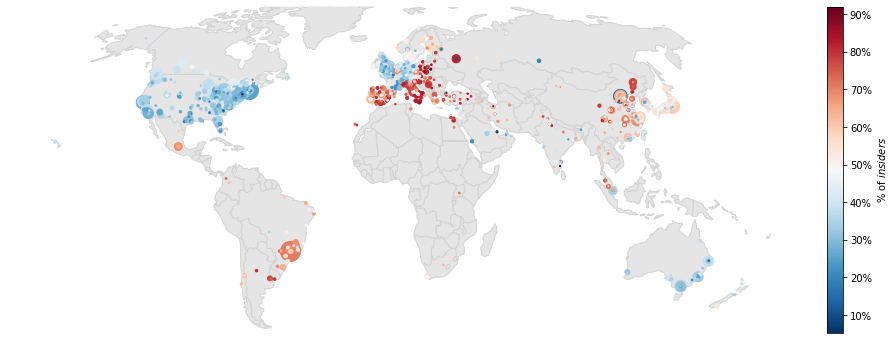

In [6]:
fig1df = gdf.copy()
fig1df['insiders'] = fig1df.pct_insiders/100

ax = geoplot.polyplot(world,projection=geoplot.crs.Robinson(),figsize=(20,6),edgecolor='lightgray',facecolor='#E5E5E5')
geoplot.pointplot(
    fig1df, 
    projection=geoplot.crs.Robinson(),
    hue='insiders', 
    cmap=sns.color_palette("RdBu_r", as_cmap=True),#'plasma_r',
    legend=True,
    ax=ax,
    scale='number_researchers',limits=(1,20),
    legend_kwargs={'format':mtick.PercentFormatter(1.0),'label': "% of $\it{insiders}$"}
)
plt.savefig('../img/figure1.tif',dpi=300)

### Figure 2 - Distribution across regions

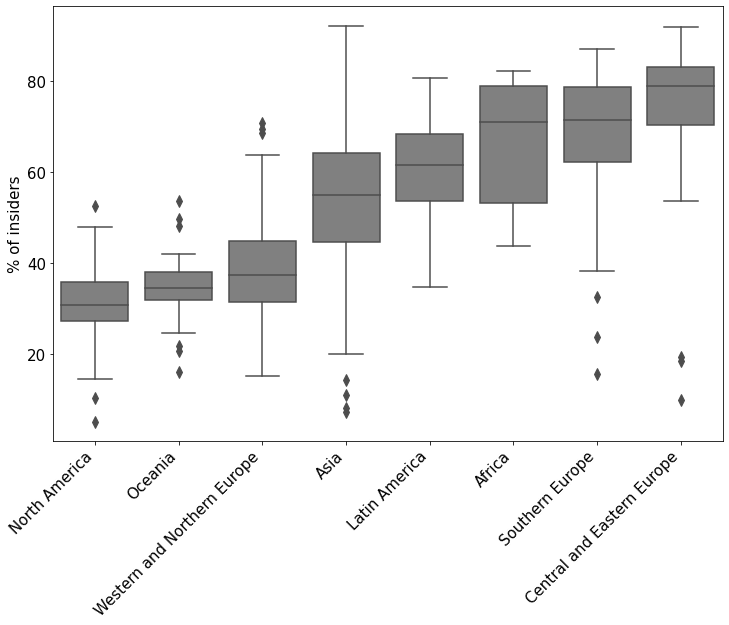

In [7]:
fig,ax = plt.subplots(
    nrows=1, 
    ncols=1,
    figsize=(12,8)
)

sns.boxplot(
    data=gdf,
    x='geo_region',
    y='pct_insiders',
    #order=['North America','Oceania','Western and Northern Europe','Asia','Latin America','Africa','Southern Europe','Central and Eastern Europe'],
    order=gdf.groupby('geo_region').pct_insiders.median().sort_values().index,
    ax=ax,
    color='gray',
    fliersize=8
)

ax.set_ylabel('% of insiders',fontsize=15)
ax.set_xlabel('',fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')

plt.savefig('../img/figure2.tif',dpi=300)

### Figure 3 - Distribution across countries

selecting only countries with more than 10 universities

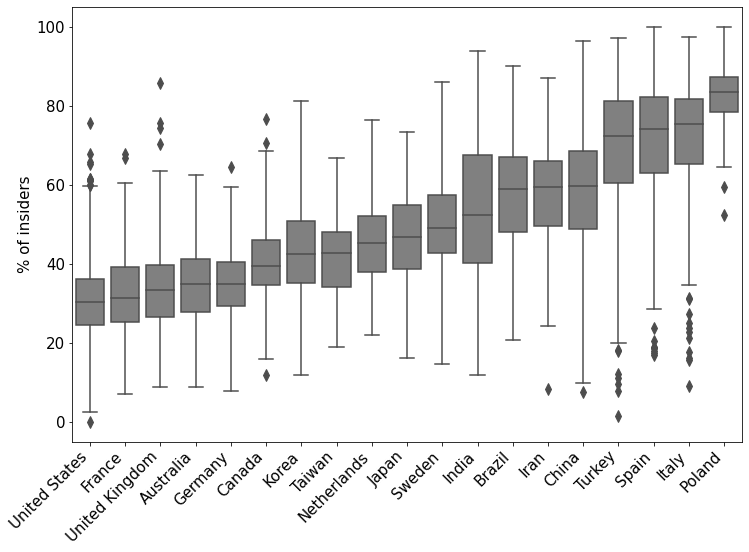

In [8]:
cntrs = gdf.groupby('grid_country_code').size()
important_countries = list(cntrs[cntrs>10].index)
fig3df = df[df.grid_country_code.isin(important_countries)]

fig,ax = plt.subplots(
    nrows=1, 
    ncols=1,
    figsize=(12,8)
)

sns.boxplot(
    data=fig3df,
    x='country_name',
    y='pct_insiders',
    order=fig3df.groupby('country_name').pct_insiders.median().sort_values().index,
    ax=ax,
    color='gray',
    fliersize=8,
    whis=2
)

ax.set_ylabel('% of insiders',fontsize=15)
ax.set_xlabel('')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.savefig('../img/figure3.tif',dpi=300)

### Table 2 - Full results

In [9]:
def describe_group(g):
    return pd.Series({
        'Insiders':g.pct_insiders.median(),
        'Domestic outsiders':g.pct_domesticoutsiders.median(),
        'Foreign outsiders':g.pct_foreignoutsiders.median(),
        'Number of universities': g.shape[0]
    })

tbl2part1 = gdf.groupby('geo_region').apply(describe_group).sort_values(by='Insiders',ascending=False)
tbl2part1

,Insiders,Domestic outsiders,Foreign outsiders,Number of universities
geo_region,,,,
Central and Eastern Europe,78.8,14.7,5.8,59.0
Southern Europe,71.4,20.9,5.6,95.0
Africa,70.9,11.8,19.8,17.0
Latin America,61.4,27.5,7.8,44.0
Asia,54.9,32.1,9.2,448.0
Western and Northern Europe,37.4,40.9,22.6,204.0
Oceania,34.5,34.1,30.3,37.0
North America,30.9,52.9,16.1,226.0


In [10]:
tbl2part2 = gdf[gdf.grid_country_code.isin(important_countries)].groupby('country_name').apply(describe_group).sort_values(by='Insiders',ascending=False)
pd.concat([tbl2part1,tbl2part2])

,Insiders,Domestic outsiders,Foreign outsiders,Number of universities
Central and Eastern Europe,78.8,14.7,5.8,59.0
Southern Europe,71.4,20.9,5.6,95.0
Africa,70.9,11.8,19.8,17.0
Latin America,61.4,27.5,7.8,44.0
Asia,54.9,32.1,9.2,448.0
Western and Northern Europe,37.4,40.9,22.6,204.0
Oceania,34.5,34.1,30.3,37.0
North America,30.9,52.9,16.1,226.0
Poland,82.5,10.3,5.3,27.0
Italy,75.5,20.6,4.5,39.0


### Figure 4 - Size of national research system (log) and median % of foreign outsiders

in the first step compute per country:
* median share of insiders
* log of sum of researchers

In [11]:
fig4df = gdf.groupby('country_name').apply(lambda g: pd.Series({
    'pct_foreignoutsiders':g.pct_foreignoutsiders.median(),
    'ln_researchers':np.log(g.number_researchers.sum()),
    'continent':g.continent.iloc[0]
}))
fig4df.rename(index={
    'Czech Republic':'Czech Rep.'
},inplace=True)
fig4df

,pct_foreignoutsiders,ln_researchers,continent
country_name,,,
Algeria,9.5,6.1,Africa
Argentina,6.7,8.5,North & South America
Australia,29.7,11.2,Oceania
Austria,31.3,9.4,Europe
Belgium,20.1,9.8,Europe
...,...,...,...
Uganda,19.2,6.4,Africa
United Arab Emirates,72.6,6.5,Asia
United Kingdom,26.3,11.7,Europe


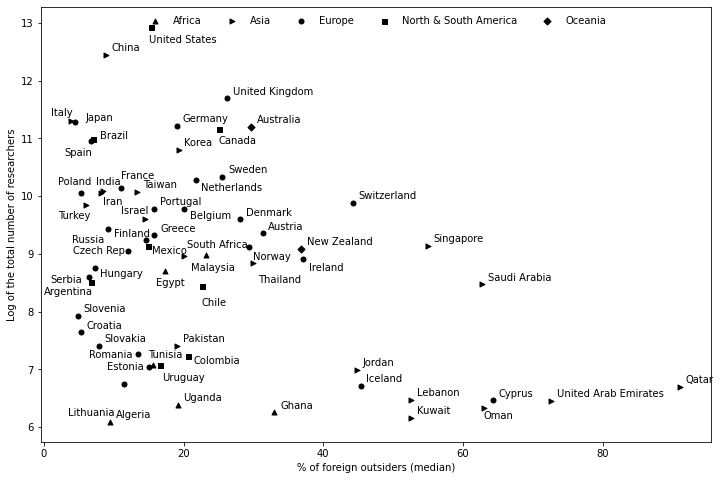

In [12]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,8))
markers = {'Europe':'o','North & South America':'s','Asia':'>','Africa':'^','Oceania':'D'}

explicit_pos = {
      'United States':(15,12.65),
      'Italy':(1,11.4),
      'Japan':(6,11.3),
      'Brazil':(8,11),
      'Spain':(3,10.7),
      'Canada':(25,10.9),
      'Netherlands':(22.5,10.1),
      'Belgium':(20.9,9.6),
      'Poland':(2,10.2),
      'Turkey':(2,9.6),
      'Iran':(8.5,9.85),
      'France':(11.1,10.3),
      'India':(7.5,10.2),
      'Israel':(11,9.7),
      'Russia':(4,9.2),
      'Czech Rep.':(4.2,9.0),
      'Argentina':(0,8.3),
      'Serbia':(1,8.5),
      'Hungary':(8.1,8.6),
      'Finland':(10,9.3),
      'Mexico':(15.5,9.0),
      'Egypt':(16,8.45),
      'Malaysia':(21.0,8.7),
      'Chile':(22.6,8.1),
      'South Africa':(20.5,9.1),
      'Thailand':(30.7,8.5),
      'Norway':(30,8.9),
      'Ireland':(38,8.7),
      'Estonia':(9,7),
      'Uruguay':(17,6.8),
      'Tunisia':(14.9,7.2),
     'Colombia':(21.5,7.1),
     'Lithuania':(3.5,6.2),
     'Oman':(63.,6.15),
    'Romania':(6.5,7.2)
    }

for name, group in fig4df.groupby('continent'):
    ax = group.plot.scatter(x='pct_foreignoutsiders',y='ln_researchers',ax=ax,marker=markers[name],color='k',s=25,label=name)

for k, v in fig4df.iterrows():
    if not k in explicit_pos:
        ax.annotate(k, (v[0] + .8,v[1] + .07),fontweight='light')
    else:
        ax.annotate(k, explicit_pos[k],fontweight='light')
ax.set_ylabel('Log of the total number of researchers')
ax.set_xlabel('% of foreign outsiders (median)')
ax.legend(loc='upper center',ncol=5,frameon=False)
plt.savefig('../img/figure4.tif',dpi=300)

### Figure 5 - Distribution across disciplines

Sample is filtered with two conditions: 
 
 1. universities with at least 30 authors in the respective discipline 
 2. disciplines, for which such data is available in at least 30 universities

In [13]:
fig5df = df[df.discipline_name != 'All']
fig5df = fig5df[fig5df.number_researchers >= 30]
disc = fig5df.groupby('discipline_name').size()
important_disciplines = disc[disc>=30].index
fig5df = fig5df[fig5df.discipline_name.isin(important_disciplines)]
fig5df.head()

,organization_name,discipline_name,grid_id,discipline_id,number_researchers,pct_insiders,pct_domesticoutsiders,pct_foreignoutsiders,grid_country_code,established_year,country_name,geo_region,continent,latitude,longitude
0,Australian National University,Earth Sciences,grid.1001.0,4,173,35.8,23.7,40.5,AU,1946,Australia,Oceania,Oceania,-35.3,149.1
2,Australian National University,Physical Sciences,grid.1001.0,2,309,35.9,15.9,48.2,AU,1946,Australia,Oceania,Oceania,-35.3,149.1
3,Australian National University,"Commerce, Management, Tourism and Services",grid.1001.0,15,57,40.4,22.8,36.8,AU,1946,Australia,Oceania,Oceania,-35.3,149.1
4,Australian National University,Agricultural and Veterinary Sciences,grid.1001.0,7,45,44.4,26.7,28.9,AU,1946,Australia,Oceania,Oceania,-35.3,149.1
5,Australian National University,Biological Sciences,grid.1001.0,6,414,38.2,25.4,36.5,AU,1946,Australia,Oceania,Oceania,-35.3,149.1


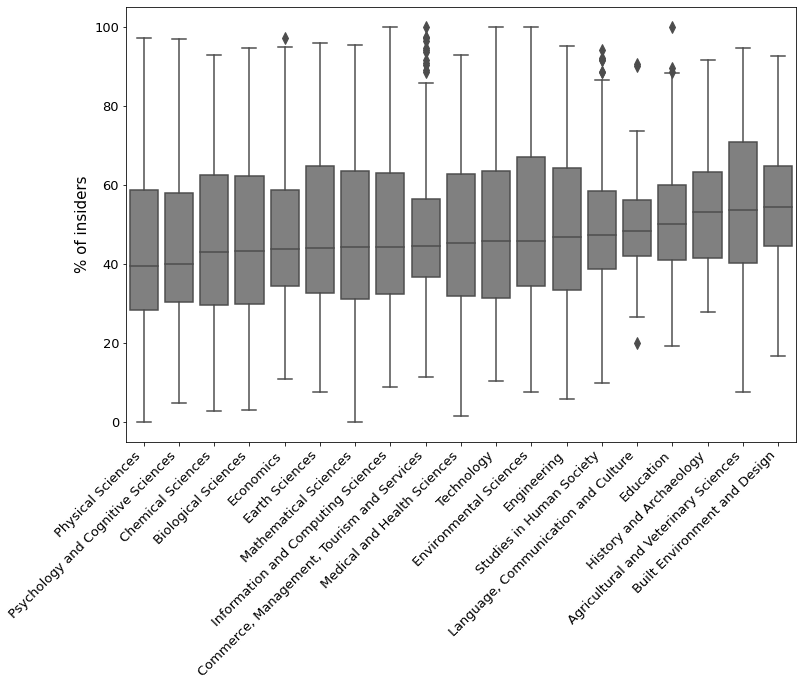

In [14]:
fig,ax = plt.subplots(
    nrows=1, 
    ncols=1,
    figsize=(12,8)
)

sns.boxplot(
    data=fig5df,
    x='discipline_name',
    y='pct_insiders',
    order=fig5df.groupby('discipline_name').pct_insiders.median().sort_values().index,
    ax=ax,
    color='gray',
    fliersize=8
)

ax.set_ylabel('% of insiders',fontsize=15)
ax.set_xlabel('')
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
plt.savefig('../img/figure5.tif',dpi=300)